#### This notebook is to find which feature are important

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline  

In [2]:
df = pd.read_csv('../data/processed_transaction.csv')
df.head()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,...,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,733493772,3,5000.00,492,9184,0,5000.0,0.00,733493772,492,...,8,19,4,50,2020,4,1,2014,8,3
1,733493772,3,4888.67,492,9184,0,5000.0,111.33,733493772,492,...,9,22,32,39,2023,6,1,2014,8,3
2,733493772,3,4863.92,492,9184,0,5000.0,136.08,733493772,492,...,11,13,36,55,2027,12,1,2014,8,3
3,733493772,3,4676.52,492,9184,0,5000.0,323.48,733493772,492,...,11,22,47,46,2029,9,1,2014,8,3
4,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,...,16,1,41,11,2024,10,1,2014,8,3


In [3]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']

In [ ]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

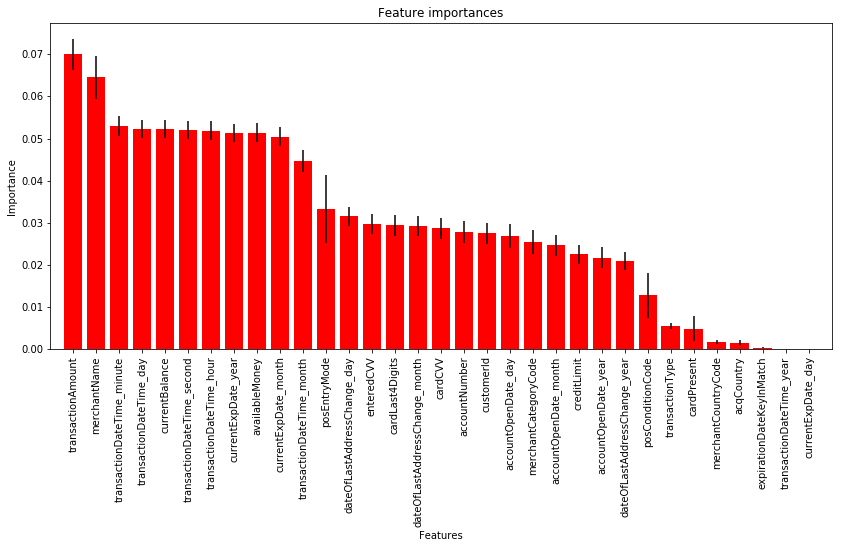

In [53]:
# Plot the feature importances of the forest
columns_sorted_by_importance = [X.columns[f] for f in indices]
plt.figure(figsize=(14,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), columns_sorted_by_importance, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xlim([-1, X.shape[1]])
plt.show()

### Important features 

So The followings are the high importance feature

- transactionAmount
- merchantName
- transactionDateTime_minute
- transactionDateTime_day
- currentBalance
- transactionDateTime_second
- transactionDateTime_hour
- currentExpDate_year
- availableMoney
- currentExpDate_month
- transactionDateTime_month

In [60]:
# let write this importance to csv. so that we can use later.

import csv
columns_importance = [(X.columns[f], importances[f]) for f in indices]
with open('../data/feature_importance.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for row in columns_importance:
        writer.writerow(row)

Refernce code from 

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html